In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
'''
a = lower diagonal below main
b = main diagonal
c = upper diagonal above main

'''
def thomas_solver(a, b, c, d):
    N = len(b)
    cp, dp, xs = np.zeros(N), np.zeros(N), np.zeros(N)      # initilization to zero 

    cp[0] = c[0] / b[0]
    dp[0] = d[0] / b[0]             # starting normalization 

    for i in range(1, N):
        denom = b[i] - a[i] * cp[i - 1]                            
        cp[i] = c[i] / denom                       
        dp[i] = (d[i] - a[i] * dp[i - 1]) / denom

    xs[-1] = dp[-1]
    for i in range(N - 2, -1, -1):                # since N-1 term is dp[-1] which is alredy assigned explicitly
        xs[i] = dp[i] - cp[i] * xs[i + 1]

    return xs


In [3]:
def solve_eqn(variables):
    alpha, L, Nx, Nt, dt, u_boundary, u_ini,r = variables    # unpacking the variables 
    

    u = u_ini.copy()                          # making a copy of the u_ini
    
    ts = np.linspace(0.0, Nt * dt, Nt + 1)
    xs_solns = np.zeros((Nx, Nt + 1))         # 2d matrix with rows gives xs and columns are at differnet time 

    for t in range(Nt + 1):                   # running loop for Nt+1 times 
        xs_solns[:, t] = u.copy()             # for 1st loop u is u_ini 

        
        # Construct RHS vector d for interior points        
        d = np.zeros(Nx - 2)      # since Nx is total points ..Nx-2 is interior excluding the boundries
        
        for i in range(1,Nx - 3):   # calculated for only the d1 to d[-2]
            d[i] = (1 - r) * u[i + 1] + 0.5 * r * (u[i] + u[i + 2])
        
       # Add boundary contributions      # explicit calculation of d[0] and d[-1] as they involve boundary values also 
        d[0] +=   r * u[0] + (1-r)*u[1] + 0.5*r*u[2]     # Left boundary
        d[-1] += r * u[-1]  +(1-r)*u[-2] + 0.5*r*u[-3]  # Right boundary '''

        
        
        
        # Tridiagonal matrix coefficients
        a = np.full(Nx - 2, -0.5 * r)   # Lower diagonal
        b = np.full(Nx - 2, 1 + r)      # Main diagonal
        c = np.full(Nx - 2, -0.5 * r)   # Upper diagonal

        # Solve for interior points
        solved_u_int = thomas_solver(a, b, c, d)
        
        u[0], u[-1] = u_boundary                  # always the boundaries are same and specified  
        
        # Update full solution
        u[1:-1] = solved_u_int

    return ts, xs_solns


# Question 1

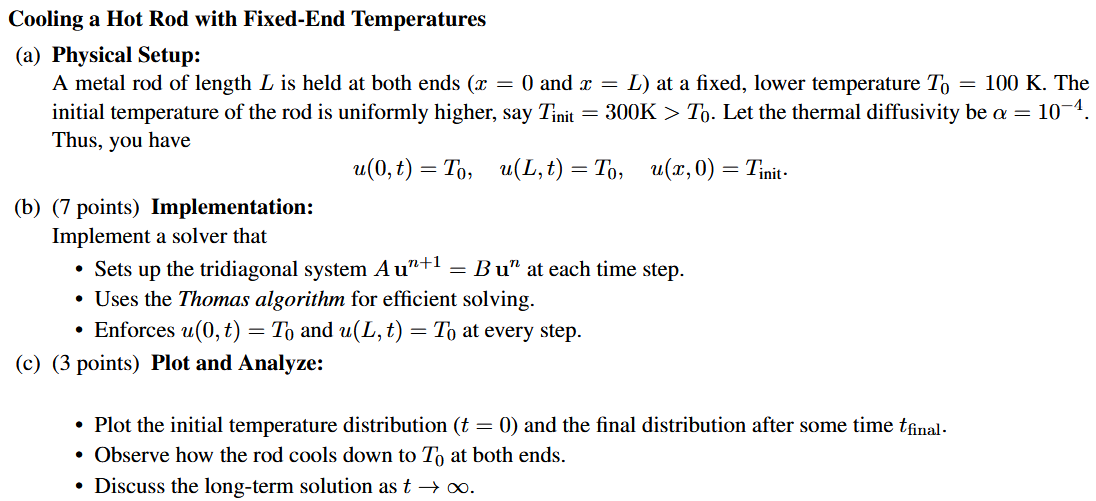

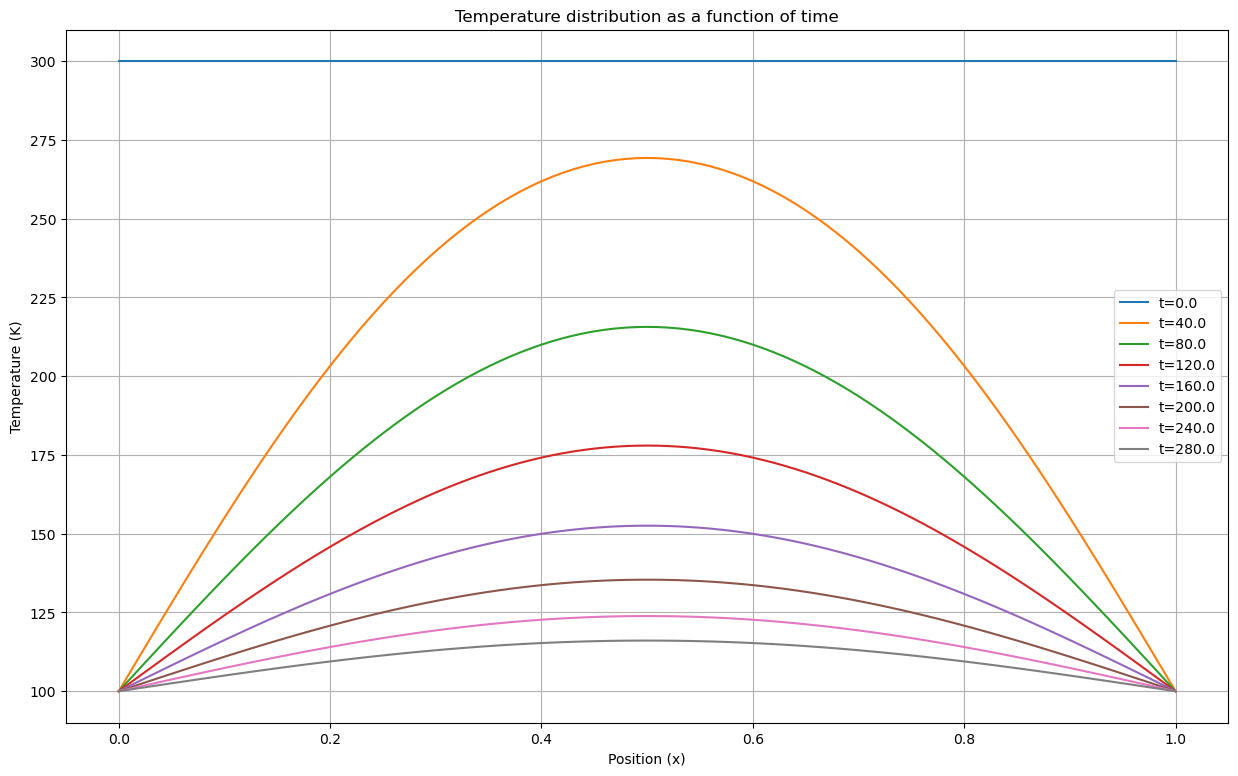

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [4]:
import time
from IPython.display import display, Math



# parameters 

L = 1.
alpha = 10e-4
Nx = 101
Nt = 3000
dt = 0.1
u_boundary = (100. , 100. )
dx = L / (Nx - 1)                         
r = alpha * dt / (dx ** 2)

xs = np.linspace(0.0, L, Nx)

# Initial condition: Gaussian bump over 300 K
u_ini = 300* np.ones(len(xs))






# Full simulation
variables = (alpha, L, Nx, Nt, dt, u_boundary, u_ini,r)
ts, solutions = solve_eqn(variables)


# Plot (sample every 400 steps)
plt.figure(figsize=(15, 9))
sample_step = 400
for k in range(0, Nt + 1, sample_step):
    plt.plot(xs, solutions[:, k], label=f"t={ts[k]:.1f}")


plt.legend()
plt.title("Temperature distribution as a function of time")
plt.xlabel("Position (x)")
plt.ylabel("Temperature (K)")
plt.grid(True)
plt.show()


display(Math(r"\text{As } t \rightarrow \infty"))

display(Math(r"\text{The total temperature profile will be a straight line at } T = 100^\circ K"))



# Question 2 

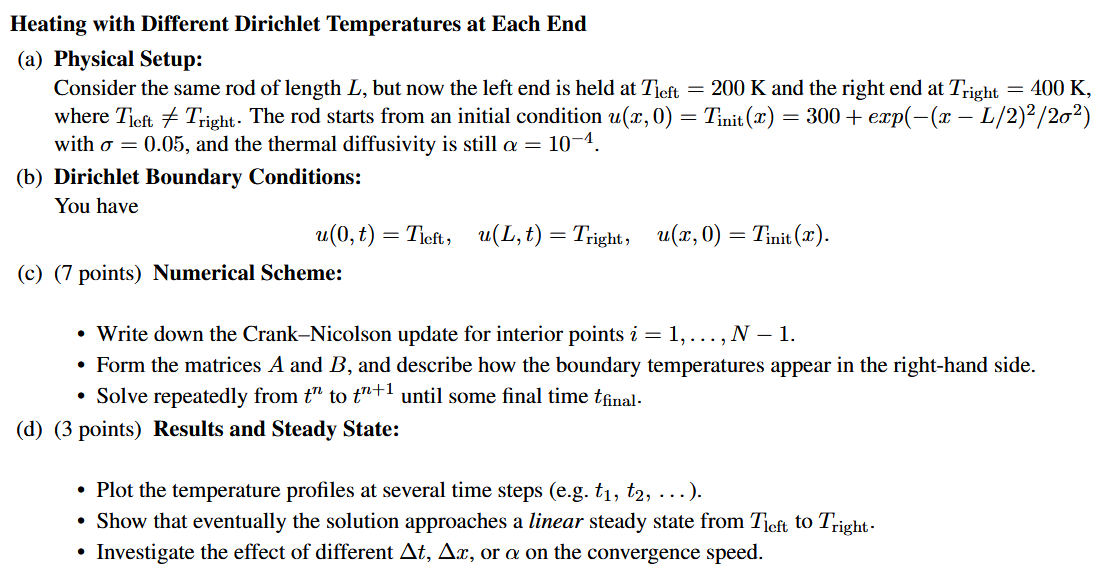

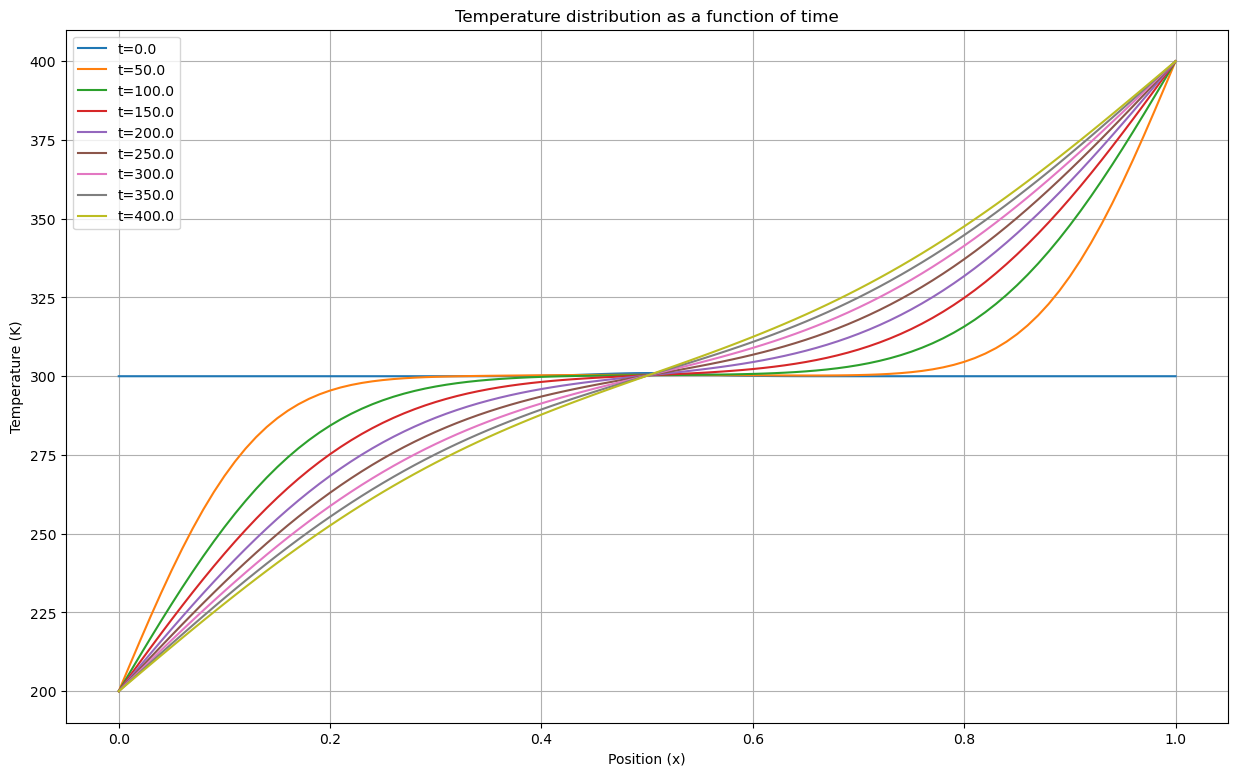

In [5]:

# Parameters
alpha = 1.0e-4
L = 1.0
Nx = 101
Nt = 4000
dt = 0.1
sigma = 0.05
u_boundary = (200.0, 400.0)
dx = L / (Nx - 1)                         
r = alpha * dt / (dx ** 2)

xs = np.linspace(0.0, L, Nx)

# Initial condition: Gaussian bump over 300 K
u_ini = 300 + np.exp(-((xs - L / 2) ** 2) / (2 * sigma ** 2))




# Full simulation
variables = (alpha, L, Nx, Nt, dt, u_boundary, u_ini,r)
ts, solutions = solve_eqn(variables)


# Plot (sample every 500 steps)
plt.figure(figsize=(15, 9))
sample_step = 500
for k in range(0, Nt + 1, sample_step):                     # plotting after every sample step time
    plt.plot(xs, solutions[:, k], label=f"t={ts[k]:.1f}")


plt.legend()
plt.title("Temperature distribution as a function of time")
plt.xlabel("Position (x)")
plt.ylabel("Temperature (K)")
plt.grid(True)
plt.show()

# Effect of $\Delta x$


since $\Delta x$ is dependent on Nx lets change Nx correspondingly $\Delta x$ will change


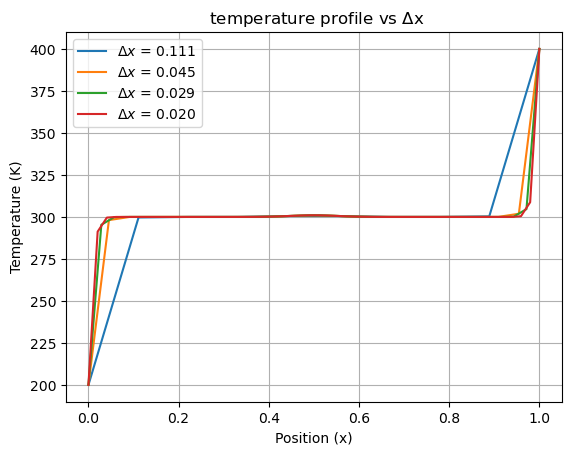

In [9]:
Nx_vals = np.linspace(10, 50, 4, dtype=int)  # Ensure integer Nx values

for i in Nx_vals:
    delta_x = L / (i - 1)
    r = alpha * dt / delta_x**2
    xs = np.linspace(0, L, i)
    u_ini = 300 + np.exp(-((xs - L/2)**2) / (2 * sigma**2))

    variables = (alpha, L, i, Nt, dt, u_boundary, u_ini,r)
    ts, solutions = solve_eqn(variables)

    plt.plot(xs, solutions[:, 5], label=f"$\\Delta x$ = {delta_x:.3f}")   # at some temp profile at random time (almost initial)


plt.title(" temperature profile vs $\\Delta$x")
plt.xlabel("Position (x)")
plt.ylabel("Temperature (K)")
plt.legend()
plt.grid(True)
plt.show()



# Effect of $\Delta t$

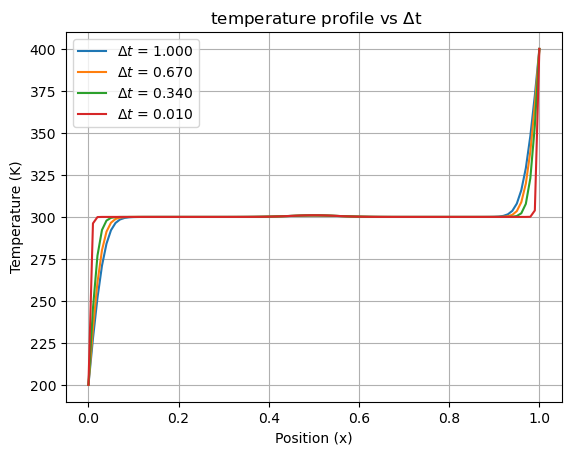

In [10]:
dt_vals = np.linspace(1, 0.01, 4)  
 
for j in dt_vals:
    r = alpha * j / dx**2
    xs = np.linspace(0, L, Nx)
    u_ini = 300 + np.exp(-((xs - L/2)**2) / (2 * sigma**2))

    variables = (alpha, L, Nx, Nt, j, u_boundary, u_ini,r)
    ts, solutions = solve_eqn(variables)

    plt.plot(xs, solutions[:, 5], label=f"$\\Delta t$ = {j:.3f}")   # at some temp profile (almost initial)


plt.title(" temperature profile vs $\\Delta $t")
plt.xlabel("Position (x)")
plt.ylabel("Temperature (K)")
plt.legend()
plt.grid(True)
plt.show()



# Effect of $\alpha$ 

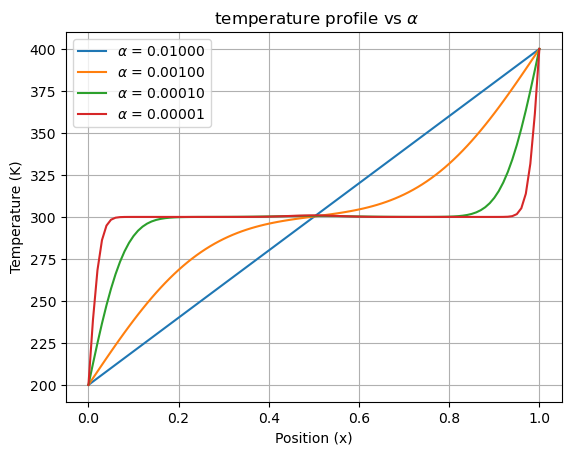

we see that as alpha is increasing  converging speed is greater


In [11]:
alphas = [1.0e-2,1.0e-3, 1.0e-4, 1.0e-5]  
 
for k in alphas:
    r = k * dt / dx**2
    xs = np.linspace(0, L, Nx)
    u_ini = 300 + np.exp(-((xs - L/2)**2) / (2 * sigma**2))

    variables = (k, L, Nx, Nt, dt, u_boundary, u_ini,r)
    ts, solutions = solve_eqn(variables)

    plt.plot(xs, solutions[:, 200], label=f"$\\alpha$ = {k:.5f}")   # at some temp profile 


plt.title(" temperature profile vs $\\alpha $")
plt.xlabel("Position (x)")
plt.ylabel("Temperature (K)")
plt.legend()
plt.grid(True)
plt.show()

print(f"we see that as alpha is increasing  converging speed is greater") # for same conditions